In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
def findFiles(path): return glob.glob(path)

import unicodedata
import string
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )
names = {}
languages = []
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]
for filename in findFiles("names\*.txt"):
    category = os.path.splitext(os.path.basename(filename))[0]
    languages.append(category)
    lines = readLines(filename)
    names[category] = lines
n_categories = len(languages)

def findName(dict, name):
    keys = dict.keys()
    for key in keys:
        if name in dict[key]:
            return key
    return ''
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    for li, letter in enumerate(name):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor


category = Spanish / name = Ubina
category = Chinese / name = Tsen
category = Dutch / name = Meeuwissen
category = Portuguese / name = Matos
category = Arabic / name = Safar
category = Polish / name = Chlebek
category = Scottish / name = Duncan
category = Italian / name = Adimari
category = Portuguese / name = Delgado
category = Czech / name = Herodes


C:\Users\JkL\AppData\Local\Temp\ipykernel_28388\340159176.py:62: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\python_arg_parser.cpp:1174.)
  p.data.add_(-learning_rate, p.grad.data)


5000 5% (0m 3s) 1.1109 Baitoff / Russian ✓
10000 10% (0m 7s) 1.6757 Mcrae / Arabic ✗ (English)
15000 15% (0m 15s) 0.5891 Libson / Russian ✓
20000 20% (0m 22s) 1.6519 Nelli / English ✗ (Italian)
25000 25% (0m 29s) 0.9149 Richards / English ✓
30000 30% (0m 37s) 3.4108 Oorschot / English ✗ (Dutch)
35000 35% (0m 44s) 0.0021 Kalabukhov / Russian ✓
40000 40% (0m 52s) 0.0256 Abeltsev / Russian ✓
45000 45% (0m 59s) 1.5173 Uddin / Russian ✗ (English)
50000 50% (1m 6s) 1.3231 Kingman / Russian ✗ (English)
55000 55% (1m 14s) 2.6379 Arena / Russian ✗ (Italian)
60000 60% (1m 21s) 0.3751 Emlin / Russian ✓
65000 65% (1m 28s) 0.0050 Baitchikov / Russian ✓
70000 70% (1m 35s) 0.0532 Nassar / Arabic ✓
75000 75% (1m 43s) 0.3922 Arian / Arabic ✓
80000 80% (1m 50s) 0.6429 Kishi / Japanese ✓
85000 85% (1m 57s) 1.9761 Stamp / Arabic ✗ (English)
90000 90% (2m 4s) 0.0610 Govyrin / Russian ✓
95000 95% (2m 11s) 0.5987 Cahill / English ✓
100000 100% (2m 18s) 0.0096 Jaklashkin / Russian ✓
Accuracy is 0.726811


C:\Users\JkL\AppData\Local\Temp\ipykernel_28388\340159176.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + languages, rotation=90)
C:\Users\JkL\AppData\Local\Temp\ipykernel_28388\340159176.py:204: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + languages)


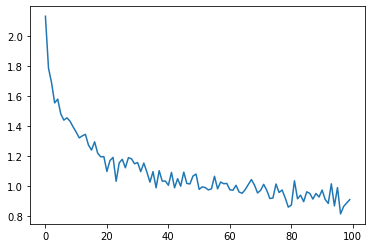

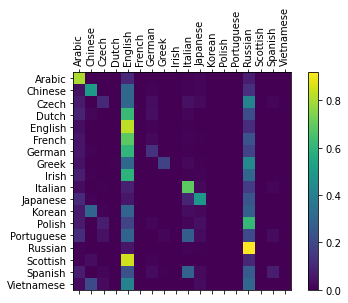

In [2]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
n_hidden = 32
rnn = RNN(n_letters, n_hidden, n_categories)
def categoryFromOutput(output):
    # compute max
    top_n, top_i = output.topk(1)
    # output index of max
    category_i = top_i.item()
    return languages[category_i], category_i
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(languages)
    name = randomChoice(names[category])
    category_tensor = torch.tensor([languages.index(category)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    return category, name, category_tensor, name_tensor

for i in range(10):
    category, name, category_tensor, name_tensor = randomTrainingExample()
    print('category =', category, '/ name =', name)
learning_rate = 0.005 # For this example, we keep the learning rate fixed
criterion = nn.NLLLoss()


def train(category_tensor, name_tensor):
    # initialize hidden state - do this every time before passing an input sequence
    hidden = rnn.initHidden()
    # reset grad counters - do this every time after backprop
    rnn.zero_grad()
    # manually go through each element in input sequence
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
    # backpropagate based on loss at last element only
    loss = criterion(output, category_tensor)
    loss.backward()

    # Update network parameters
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()
"""
for iter in range(1, n_iters + 1):
    category, name, category_tensor, name_tensor = randomTrainingExample()
    output, loss = train(category_tensor, name_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, name, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
"""

counts=0

for epoch in range(0,5):
    l=[]
    for key in languages:
        for name in names[key]:
            l.append((key,name))
    random.shuffle(l)
    for i in range(len(l)):
        counts+=1
        category,name=l[i]
        category_tensor = torch.tensor([languages.index(category)], dtype=torch.long)
        name_tensor = nameToTensor(name)
        output, loss = train(category_tensor, name_tensor)
        current_loss += loss

        # Print iter number, loss, name and guess
        if counts % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (counts, counts / n_iters * 100, timeSince(start), loss, name, guess, correct))

                # Add current loss avg to list of losses
        if counts % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0
"""
new_names = [] 
item_list = []
for item in languages:
    for name in names[item]:
        item_list = [item, name]
        new_names.append(item_list)

random.shuffle(new_names)

epoch = 5
count = 0

for i in range(epoch):

    for iter in range(len(new_names)):
        # category, name, category_tensor, name_tensor = randomTrainingExample()
        category = new_names[iter][0]
        name = new_names[iter][1]
        category_tensor = torch.tensor([languages.index(category)], dtype=torch.long)
        name_tensor = nameToTensor(name)
        output, loss = train(category_tensor, name_tensor)
        current_loss += loss
        count += 1

            # Print iter number, loss, name and guess
        if count % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (count, count / n_iters * 100, timeSince(start), loss, name, guess, correct))

                # Add current loss avg to list of losses
        if count % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0 """

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 20000

# return an output given an input name
def evaluate(name_tensor):
    hidden = rnn.initHidden()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(len(l)):
    category,name = l[i]
    category_tensor = torch.tensor([languages.index(category)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    output = evaluate(name_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = languages.index(category)
    confusion[category_i][guess_i] += 1
    
accuracy = sum(confusion.diag())/sum(sum(confusion))
print('Accuracy is %f' % accuracy.item())

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + languages, rotation=90)
ax.set_yticklabels([''] + languages)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()


In [3]:
for key in languages:
    random.shuffle(names[key])

In [5]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import numpy as np
import pandas as pd
import unicodedata
import string
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from torch.nn.utils.rnn import pad_sequence

# In[5]:


def findFiles(path): 
    return glob.glob(path)

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


# In[6]:


names = {}
languages = []


def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# (TO DO:) CHANGE FILE PATH AS NECESSARY
for filename in findFiles("names\*.txt"):
    category = os.path.splitext(os.path.basename(filename))[0]
    languages.append(category)
    lines = readLines(filename)
    names[category] = lines


# In[7]:


n_categories = len(languages)

def letterToIndex(letter):
    return all_letters.find(letter)


def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    for li, letter in enumerate(name):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor


# In[54]:


class RNN(nn.Module):
    def __init__(self, INPUT_SIZE, HIDDEN_SIZE, N_LAYERS,OUTPUT_SIZE):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = HIDDEN_SIZE, # number of hidden units
            num_layers = N_LAYERS, # number of layers
            batch_first = True)
        self.out = nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)
            
    def forward(self, x):
        r_out, h = self.rnn(x, None) # None represents zero initial hidden state           
        out = self.out(r_out[:, -1, :])
        return out


# In[8]:


n_hidden = 128

allnames = [] # Create list of all names and corresponding output language
for language in list(names.keys()):
    for name in names[language]:
        allnames.append([name, language])
        
## (TO DO:) Determine Padding length (this is the length of the longest string) 
long=0
for i in range(len(allnames)):
    if len(allnames[i][0])>long:
        long =len(allnames[i][0])
    
maxlen = long # Add code here to compute the maximum length of string   
n_letters = len(all_letters)
n_categories = len(languages)

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i.item()
    return languages[category_i], category_i

           


# In[13]:


learning_rate = 0.005
rnn = RNN(n_letters, 128, 1, n_categories)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)   # optimize all rnn parameters
loss_func = nn.CrossEntropyLoss()  

for epoch in range(5):  
    batch_size = len(allnames)
    random.shuffle(allnames)
    
    # if "b_in" and "b_out" are the variable names for input and output tensors, you need to create those
    
    b_in = torch.zeros(batch_size, maxlen, n_letters)  # (TO DO:) Initialize "b_in" to a tensor with size of input (batch size, padded_length, n_letters)
    b_out = torch.zeros(batch_size, n_categories, dtype=torch.long)  # (TO DO:) Initialize "b_out" to tensor with size (batch_size, n_categories, dtype=torch.long)       

    # (TO DO:) Populate "b_in" tensor 
    b_in=pad_sequence([nameToTensor(i[0])  for i in allnames ], batch_first=True)
    b_in=b_in.reshape([batch_size, maxlen, n_letters])
    # (TO DO:) Populate "b_out" tensor
    b_out=pad_sequence([torch.tensor([languages.index(i[1])], dtype=torch.long)  for i in allnames ], batch_first=True).reshape(batch_size)

    output = rnn(b_in)                               # rnn output
    #(TO DO:)
    loss = loss_func(output, b_out)   # (TO DO:) Fill "...." to calculate the cross entropy loss
    optimizer.zero_grad()                           # clear gradients for this training step
    loss.backward()                                 # backpropagation, compute gradients
    optimizer.step()                        
    # apply gradients
        
    # Print accuracy
    test_output = rnn(b_in)                   # 
    pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
    test_y = b_out.data.numpy().squeeze()
    accuracy = sum(pred_y == test_y)/batch_size
    print("Epoch: ", epoch, "| train loss: %.4f" % loss.item(), '| accuracy: %.2f' % accuracy)


Epoch:  0 | train loss: 2.9099 | accuracy: 0.47
Epoch:  1 | train loss: 2.6613 | accuracy: 0.47
Epoch:  2 | train loss: 2.1768 | accuracy: 0.47
Epoch:  3 | train loss: 1.9066 | accuracy: 0.47
Epoch:  4 | train loss: 1.9550 | accuracy: 0.47


In [6]:
a=nameToTensor()

TypeError: nameToTensor() missing 1 required positional argument: 'name'

In [7]:
test_output

tensor([[ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        ...,
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025]],
       grad_fn=<AddmmBackward0>)

In [8]:
b=nameToTensor('Khoury')

In [9]:
b_out

tensor([ 4, 16, 16,  ..., 14, 13, 14])

In [10]:
test_output

tensor([[ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        ...,
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025],
        [ 1.7887, -1.4011, -0.7842,  ..., -1.6548, -1.3597, -2.0025]],
       grad_fn=<AddmmBackward0>)

In [11]:
[torch.tensor([languages.index(i[1])])  for i in allnames ]

[tensor([4]),
 tensor([16]),
 tensor([16]),
 tensor([14]),
 tensor([14]),
 tensor([3]),
 tensor([6]),
 tensor([14]),
 tensor([0]),
 tensor([0]),
 tensor([0]),
 tensor([5]),
 tensor([14]),
 tensor([11]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 tensor([0]),
 tensor([11]),
 tensor([16]),
 tensor([14]),
 tensor([4]),
 tensor([14]),
 tensor([4]),
 tensor([14]),
 tensor([4]),
 tensor([14]),
 tensor([14]),
 tensor([4]),
 tensor([6]),
 tensor([14]),
 tensor([16]),
 tensor([16]),
 tensor([0]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 tensor([12]),
 tensor([14]),
 tensor([4]),
 tensor([14]),
 tensor([4]),
 tensor([14]),
 tensor([4]),
 tensor([6]),
 tensor([8]),
 tensor([4]),
 tensor([14]),
 tensor([10]),
 tensor([14]),
 tensor([14]),
 tensor([4]),
 tensor([1]),
 tensor([0]),
 tensor([4]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 tensor([13]),
 tensor([14]),
 tensor([10]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 tensor([14]),
 ten

In [ ]:
b_out=pad_sequence([torch.tensor(languages.index(i[1]))  for i in allnames ], batch_first=True)

In [ ]:
from torch.nn.utils.rnn import pad_sequence
pad_sequence([a, b], batch_first=True).size()

In [ ]:
pad_sequence([a, b], batch_first=True)[1]

In [ ]:
 b_in=pad_sequence([nameToTensor(i[0])  for i in allnames ], batch_first=True)

In [ ]:
b_in=b_in.reshape([20074, 19, 57])